# [Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/overview/description)

## Objective: 

- Build a model that predicts the probability that a driver will initiate an auto insurance claim in the next year

## Goal:

1. Reduce unnecessary insurance cost, improve driver's willingness to buy vehicle insurance
2. Help insurance company to price their insurance produce more accurately, improve customer analysis and gain competitive advantage
3. Narrow down customer feature extraction area and reduce research cost, and speed up claim response

## Proposal

- **Business Analysis**: Reseach project background in kaggle discussion board to gain a better understanding on features and the project itself.

- **Data Analysis**: Analyze features to see if there is similarity in between. Determine which features are useful to the project. Determin ways to analyze features, such as data visualization. Determine which models are to be used to make predictions. 

# 1.  Porto Seguo - Data Overview¶

In this competition we are tasked with making predictive models that can predict if a given driver will make insurance claim. One of the key aspects of this dataset is that it has already been nicely cleaned, with many categorical information nicely labeled and name accordingly - some simply as unordered categorical features, other are with ordinal values that represent the underlying logic.

As directly quoted from the data description about different postfix:

- bin to indicate binary features  
- cat to indicate categorical features  
- Features without these designations are either continuous or ordinal  
- Additionally, value of -1 indicate missing values.  

## 1.1 Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# data
from sklearn.compose import ColumnTransformer, make_column_transformer

# Classifiers
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# classifiers / models
from sklearn.linear_model import LogisticRegression


from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

#other
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
    
)

from sklearn.metrics import roc_auc_score, roc_curve, auc

## 1.2 Read & Split the data

In [2]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
sample_submission=pd.read_csv('./data/sample_submission.csv')

In [3]:
target = "target"
X_train, y_train = train.drop(columns=target), train[target]
X_train = X_train.drop(columns="id")
X_test = test.drop(columns="id")

In [4]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [5]:
train.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,...,4,4,3,8,0,1,0,0,0,0


In [6]:
def check_data(df):
    #check dataframe's first 5 and last 5 rows at once
    return df.head().append(df.tail())

check_data(train)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,...,4,4,3,8,0,1,0,0,0,0


## 1.3 Taking a Random Sample

In [7]:
#randomely select 5 samples from each target value:
positive_sample = train[train.target==1].sample(n=5, random_state=123)
negative_sample = train[train.target==0].sample(n=5, random_state=123)

sample = pd.concat([positive_sample, negative_sample]).reset_index()
sample

,index,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,354540,885885,1,2,1,9,0,0,0,1,...,6,1,1,7,0,1,0,1,1,0
1,131166,327764,1,7,3,7,0,0,0,0,...,13,1,1,8,0,0,1,0,0,0
2,166021,415019,1,2,1,5,0,5,0,1,...,3,2,2,14,0,1,1,0,0,0
3,339529,848228,1,5,1,2,0,0,0,0,...,4,1,6,8,0,0,0,1,1,1
4,299986,749566,1,1,1,6,1,0,1,0,...,10,3,3,11,0,0,1,0,0,0
5,379320,947975,0,1,2,1,0,0,1,0,...,4,2,5,5,0,1,0,0,0,0
6,33180,83183,0,1,1,4,0,0,0,1,...,3,0,4,14,0,1,1,0,0,0
7,60616,151937,0,0,1,6,0,0,1,0,...,7,1,3,4,0,0,1,0,1,0
8,254795,636826,0,0,1,3,0,0,1,0,...,3,0,2,9,0,1,1,0,0,0
9,372085,929986,0,0,1,5,1,0,0,0,...,6,3,2,9,0,0,0,0,1,1


In [8]:
sample_group = sample.groupby('target')
#list(sample.groupby('target'))

In [9]:
sample_group.ngroups

2

In [10]:
sample_group.size()

target
0    5
1    5
dtype: int64

In [11]:
sample_group.first()

,index,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
target,,,,,,,,,,,,,,,,,,,,,
0,379320,947975,1,2,1,0,0,1,0,0,...,4,2,5,5,0,1,0,0,0,0
1,354540,885885,2,1,9,0,0,0,1,0,...,6,1,1,7,0,1,0,1,1,0


In [12]:
sample_group.last()

,index,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
target,,,,,,,,,,,,,,,,,,,,,
0,372085,929986,0,1,5,1,0,0,0,0,...,6,3,2,9,0,0,0,0,1,1
1,299986,749566,1,1,6,1,0,1,0,0,...,10,3,3,11,0,0,1,0,0,0


In [13]:
sample_group.get_group(1)

,index,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,354540,885885,2,1,9,0,0,0,1,0,...,6,1,1,7,0,1,0,1,1,0
1,131166,327764,7,3,7,0,0,0,0,0,...,13,1,1,8,0,0,1,0,0,0
2,166021,415019,2,1,5,0,5,0,1,0,...,3,2,2,14,0,1,1,0,0,0
3,339529,848228,5,1,2,0,0,0,0,1,...,4,1,6,8,0,0,0,1,1,1
4,299986,749566,1,1,6,1,0,1,0,0,...,10,3,3,11,0,0,1,0,0,0


## **Using filter**

In [14]:
# using filter to filter sample
sample_group.filter(lambda x:x['ps_calc_13'].max()>5 and x['ps_calc_11'].min()<6)

,index,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,354540,885885,2,1,9,0,0,0,1,0,...,6,1,1,7,0,1,0,1,1,0
1,131166,327764,7,3,7,0,0,0,0,0,...,13,1,1,8,0,0,1,0,0,0
2,166021,415019,2,1,5,0,5,0,1,0,...,3,2,2,14,0,1,1,0,0,0
3,339529,848228,5,1,2,0,0,0,0,1,...,4,1,6,8,0,0,0,1,1,1
4,299986,749566,1,1,6,1,0,1,0,0,...,10,3,3,11,0,0,1,0,0,0


## **Using groupby, agg, apply**

In [15]:
features = [col for col in sample.columns if col!='index' and col!='id' and col!='target']
sample.groupby('target')[features].mean()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
target,,,,,,,,,,,,,,,,,,,,,
0,0.4,1.2,3.8,0.2,0.0,0.6,0.2,0.0,0.2,0.0,...,4.6,1.2,3.2,8.2,0.0,0.6,0.6,0.0,0.4,0.2
1,3.4,1.4,5.8,0.2,1.0,0.2,0.4,0.2,0.2,0.0,...,7.2,1.6,2.6,9.6,0.0,0.4,0.6,0.4,0.4,0.2


In [16]:
sample.groupby('target')[features].quantile([0.25, 0.75])

ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
target                                                            
0      0.25        0.0            1.0        3.0            0.0   
       0.75        1.0            1.0        5.0            0.0   
1      0.25        2.0            1.0        5.0            0.0   
       0.75        5.0            1.0        7.0            0.0   

             ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
target                                                                    
0      0.25            0.0            0.0            0.0            0.0   
       0.75            0.0            1.0            0.0            0.0   
1      0.25            0.0            0.0            0.0            0.0   
       0.75            0.0            0.0            1.0            0.0   

             ps_ind_09_bin  ps_ind_10_bin  ...  ps_calc_11  ps_calc_12  \
target                                     ...                           
0      0.25            0.0            0.0  ...         3.0         0.0   
       0.75            0.0            0.0  ...         6.0         2.0   
1      0.25            0.0            0.0  ...         4.0         1.0   
       0.75            0.0            0.0  ...        10.0         2.0   

             ps_calc_13  ps_calc_14  ps_calc_15_bin  ps_calc_16_bin  \
target                                                                
0      0.25         2.0         5.0             0.0             0.0   
       0.75         4.0         9.0             0.0             1.0   
1      0.25         1.0         8.0             0.0             0.0   
       0.75         3.0        11.0             0.0             1.0   

             ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  ps_calc_20_bin  
target                                                                       
0      0.25             0.0             0.0             0.0             0.0  
       0.75             1.0             0.0             1.0             0.0  
1      0.25             0.0             0.0             0.0             0.0  
       0.75             1.0             1.0             1.0             0.0  

[4 rows x 57 columns]

In [17]:
stats_list = ['mean', 'var', 'std', 'median', 'min', 'max']
sample.groupby('target')[features].agg(stats_list).T

target                        0         1
ps_ind_01      mean    0.400000  3.400000
               var     0.300000  6.300000
               std     0.547723  2.509980
               median  0.000000  2.000000
               min     0.000000  1.000000
...                         ...       ...
ps_calc_20_bin var     0.200000  0.200000
               std     0.447214  0.447214
               median  0.000000  0.000000
               min     0.000000  0.000000
               max     1.000000  1.000000

[342 rows x 2 columns]

In [18]:
# 如何对不同列求不同的变量？ 用字典

agg_list = {
    'ps_ind_01': 'mean',
    'ps_ind_02_cat': 'var',
    'ps_ind_03': 'max'
}

# sample.groupby('target')['ps_ind_01', 'ps_ind_02_cat','ps_ind_03'].agg(agg_list).rename(
#     columns = {
#         'ps_ind_01': "mean of ps_ind_01",
#         'ps_ind_02_cat': "var of ps_ind_02_cat",
#         'ps_ind_03': "max of ps_ind_03"
#     },
    
#     index = {
#         0: 'negative',
#         1: 'positive'
#     }
# )


#Or

sample.groupby('target')['ps_ind_01', 'ps_ind_02_cat','ps_ind_03'].agg(
    mean_of_ps_ind_01 = ('ps_ind_01', 'mean'),
    var_of_ps_ind_02_cat = ('ps_ind_02_cat', 'var'),
    max_of_ps_ind_03 = ('ps_ind_03', 'max')
).rename(
    index = {
        0: 'negative',
        1: 'positive'
    }
)

<ipython-input-18-e86eecbc9b5a>:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sample.groupby('target')['ps_ind_01', 'ps_ind_02_cat','ps_ind_03'].agg(


,mean_of_ps_ind_01,var_of_ps_ind_02_cat,max_of_ps_ind_03
target,,,
negative,0.4,0.2,6
positive,3.4,0.8,9


In [19]:

# 自定义function


sample.groupby('target')['ps_ind_01', 'ps_ind_02_cat','ps_ind_03'].agg(
    ps_ind_01_iqr = ('ps_ind_01', lambda x: x.quantile(0.75)-x.quantile(0.25)),
    ps_ind_02_cat_range = ('ps_ind_02_cat', lambda x:x.max()-x.min()),
    mean_of_ps_ind_larger_than_1 = ('ps_ind_03', lambda x: True if x.mean()>1 else False)
).rename(
    index = {
        0: 'negative',
        1: 'positive'
    }
)
 

<ipython-input-19-8d445a2002f6>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sample.groupby('target')['ps_ind_01', 'ps_ind_02_cat','ps_ind_03'].agg(


,ps_ind_01_iqr,ps_ind_02_cat_range,mean_of_ps_ind_larger_than_1
target,,,
negative,1,1,True
positive,3,2,True


## **Using isin to count specific values' occurrence**

In [20]:
#% of missing values (represented by -1) in each feature
train.isin(['-1']).sum(axis=0)/train.shape[0]*100

id                 0.000000
target             0.000000
ps_ind_01          0.000000
ps_ind_02_cat      0.036290
ps_ind_03          0.000000
ps_ind_04_cat      0.013945
ps_ind_05_cat      0.975955
ps_ind_06_bin      0.000000
ps_ind_07_bin      0.000000
ps_ind_08_bin      0.000000
ps_ind_09_bin      0.000000
ps_ind_10_bin      0.000000
ps_ind_11_bin      0.000000
ps_ind_12_bin      0.000000
ps_ind_13_bin      0.000000
ps_ind_14          0.000000
ps_ind_15          0.000000
ps_ind_16_bin      0.000000
ps_ind_17_bin      0.000000
ps_ind_18_bin      0.000000
ps_reg_01          0.000000
ps_reg_02          0.000000
ps_reg_03         18.106490
ps_car_01_cat      0.017977
ps_car_02_cat      0.000840
ps_car_03_cat     69.089837
ps_car_04_cat      0.000000
ps_car_05_cat     44.782531
ps_car_06_cat      0.000000
ps_car_07_cat      1.930237
ps_car_08_cat      0.000000
ps_car_09_cat      0.095596
ps_car_10_cat      0.000000
ps_car_11_cat      0.000000
ps_car_11          0.000840
ps_car_12          0

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

Observation: there are both int64 and float64 dtype, which means the data has been processed beforehand. 


Features:

1. bin-> binary
2. cat->categorical (nominal)
3. dtype:int-> ordinal
4. dtype:float64->continuous interval


## 1.4 Creating a meta data table

In [22]:
#generate a meta data table
def generate_metadata(source_data):
    data = []
    
    for col in source_data.columns:
        #defining the role
        if col == 'target':
            role = "target"
        elif col == 'id':
            role = 'id'
        else:
            role = 'feature'
            
        #defining the level
        if 'bin' in col or col=='target':
            level = 'binary'
        elif 'cat' in col or col == 'id':
            level = 'nominal'
        elif source_data[col].dtype == 'float64':
            level = 'interval'
        elif source_data[col].dtype == 'int64':
            level = 'ordinal'
    
        #defining the data type:
        dtype = source_data[col].dtype
        
        #initialize keep = True for all features except ID
        keep = True
        if col == 'id':
            keep = False
    
    
        
    # creating the meta data table
    
        col_dict = {
            "Variable Name": col,
            "Role": role,
            "Level": level,
            "data_type": dtype,
            "Keep": keep
        }
        
        data.append(col_dict)
        
    meta = pd.DataFrame(data, columns=["Variable Name", "Role", "Level", "data_type", "Keep"])
    meta.set_index('Variable Name', inplace=True)
    
    meta["Unique_values"] = [len(set(source_data[col])) for col in source_data.columns]
    meta["Count_Missing_values"] = source_data.isin(['-1']).sum(axis=0)
    meta["Count_Missing_values_Percentage"] = round(source_data.isin(['-1']).sum(axis=0)/source_data.shape[0]*100, 2)
    return meta

In [23]:
meta_train = generate_metadata(source_data=train)

In [24]:
meta_train.to_csv('./data/meta_train.csv')

In [25]:
meta_train.sort_values("Count_Missing_values", ascending=False)

,Role,Level,data_type,Keep,Unique_values,Count_Missing_values,Count_Missing_values_Percentage
Variable Name,,,,,,,
ps_car_03_cat,feature,nominal,int64,True,3,411231,69.09
ps_car_05_cat,feature,nominal,int64,True,3,266551,44.78
ps_reg_03,feature,interval,float64,True,5013,107772,18.11
ps_car_14,feature,interval,float64,True,850,42620,7.16
ps_car_07_cat,feature,nominal,int64,True,3,11489,1.93
ps_ind_05_cat,feature,nominal,int64,True,8,5809,0.98
ps_car_09_cat,feature,nominal,int64,True,6,569,0.10
ps_ind_02_cat,feature,nominal,int64,True,5,216,0.04
ps_car_01_cat,feature,nominal,int64,True,13,107,0.02


In [27]:
pd.DataFrame(
    {'Count': meta_train.groupby(['Role', 'Level']).size()}
)

Count
Role    Level          
feature binary       17
        interval     10
        nominal      14
        ordinal      16
id      nominal       1
target  binary        1

In [28]:
# look at interval(numerical) features statistics
stats = train[meta_train[(meta_train["Level"]=="interval")].index].describe()

stats

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


In [29]:
#which interval features have missing value (i.e. -1)?

stats.loc["min", :][stats.loc["min", :]==-1].index 

#or 

stats.columns[stats.loc["min", :]==-1]

Index(['ps_reg_03', 'ps_car_12', 'ps_car_14'], dtype='object')

In [30]:
#which interval feature has the least std?

stats.columns[stats.loc['std', :].argmin()]

#or

stats.loc['std', :].index[stats.loc['std', :].argmin()]

'ps_car_12'

In [31]:
#which interval features have a max value larger than 4?

stats.loc["max", :][stats.loc["max", :] > 4].index

#or

stats.columns[stats.loc['max', :]>4]

Index(['ps_reg_03'], dtype='object')

In [32]:
#which ones are calc interval features?

calc_col_intervals = [col for col in stats.columns if "calc" in col]

# or 

# calc_col_intervals = [col for col in meta[(meta["Level"] == "interval")].index if "calc" in col]


calc_col_intervals

['ps_calc_01', 'ps_calc_02', 'ps_calc_03']

In [33]:
stats.columns[stats.columns.str.contains("calc")].to_list()

['ps_calc_01', 'ps_calc_02', 'ps_calc_03']

In [34]:
# btw how to filter rows with multiple conditions?

# rememmber to add () in between

# e.g.

In [37]:
meta_train[(meta_train["Level"] == "interval") & (meta_train["Unique_values"] >10)]

#or

meta_train.loc[(meta_train["Level"] == "interval") & (meta_train["Unique_values"] >10)]

,Role,Level,data_type,Keep,Unique_values,Count_Missing_values,Count_Missing_values_Percentage
Variable Name,,,,,,,
ps_reg_02,feature,interval,float64,True,19,0,0.00
ps_reg_03,feature,interval,float64,True,5013,107772,18.11
ps_car_12,feature,interval,float64,True,184,1,0.00
ps_car_13,feature,interval,float64,True,70482,0,0.00
ps_car_14,feature,interval,float64,True,850,42620,7.16
ps_car_15,feature,interval,float64,True,15,0,0.00


In [38]:
train[calc_col_intervals].describe()

,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000
mean,0.449756,0.449589,0.449849
std,0.287198,0.286893,0.287153
min,0.000000,0.000000,0.000000
25%,0.200000,0.200000,0.200000
50%,0.500000,0.400000,0.500000
75%,0.700000,0.700000,0.700000
max,0.900000,0.900000,0.900000


### obersvation from above
### 1. similar distribution (mean, std are close)
### 2. seem to be ratio data (max <1, min >=0, maybe log transformation, maybe scaled)

### maybe no need to use all three of them

In [39]:
#Check class imbalance

train['target'].value_counts(normalize=True)

0    0.963552
1    0.036448
Name: target, dtype: float64

In [40]:
train['target'].value_counts()[1]/train['target'].value_counts()[0]

0.037826188541597645

In [41]:
train['target'].describe()

count    595212.000000
mean          0.036448
std           0.187401
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: target, dtype: float64

<AxesSubplot:>

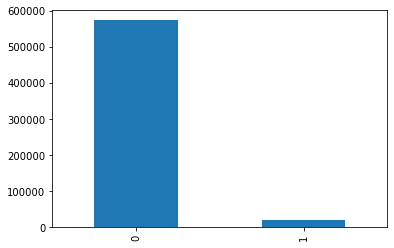

In [42]:
train['target'].value_counts().plot(kind="bar")

### Observation above: class imbalance

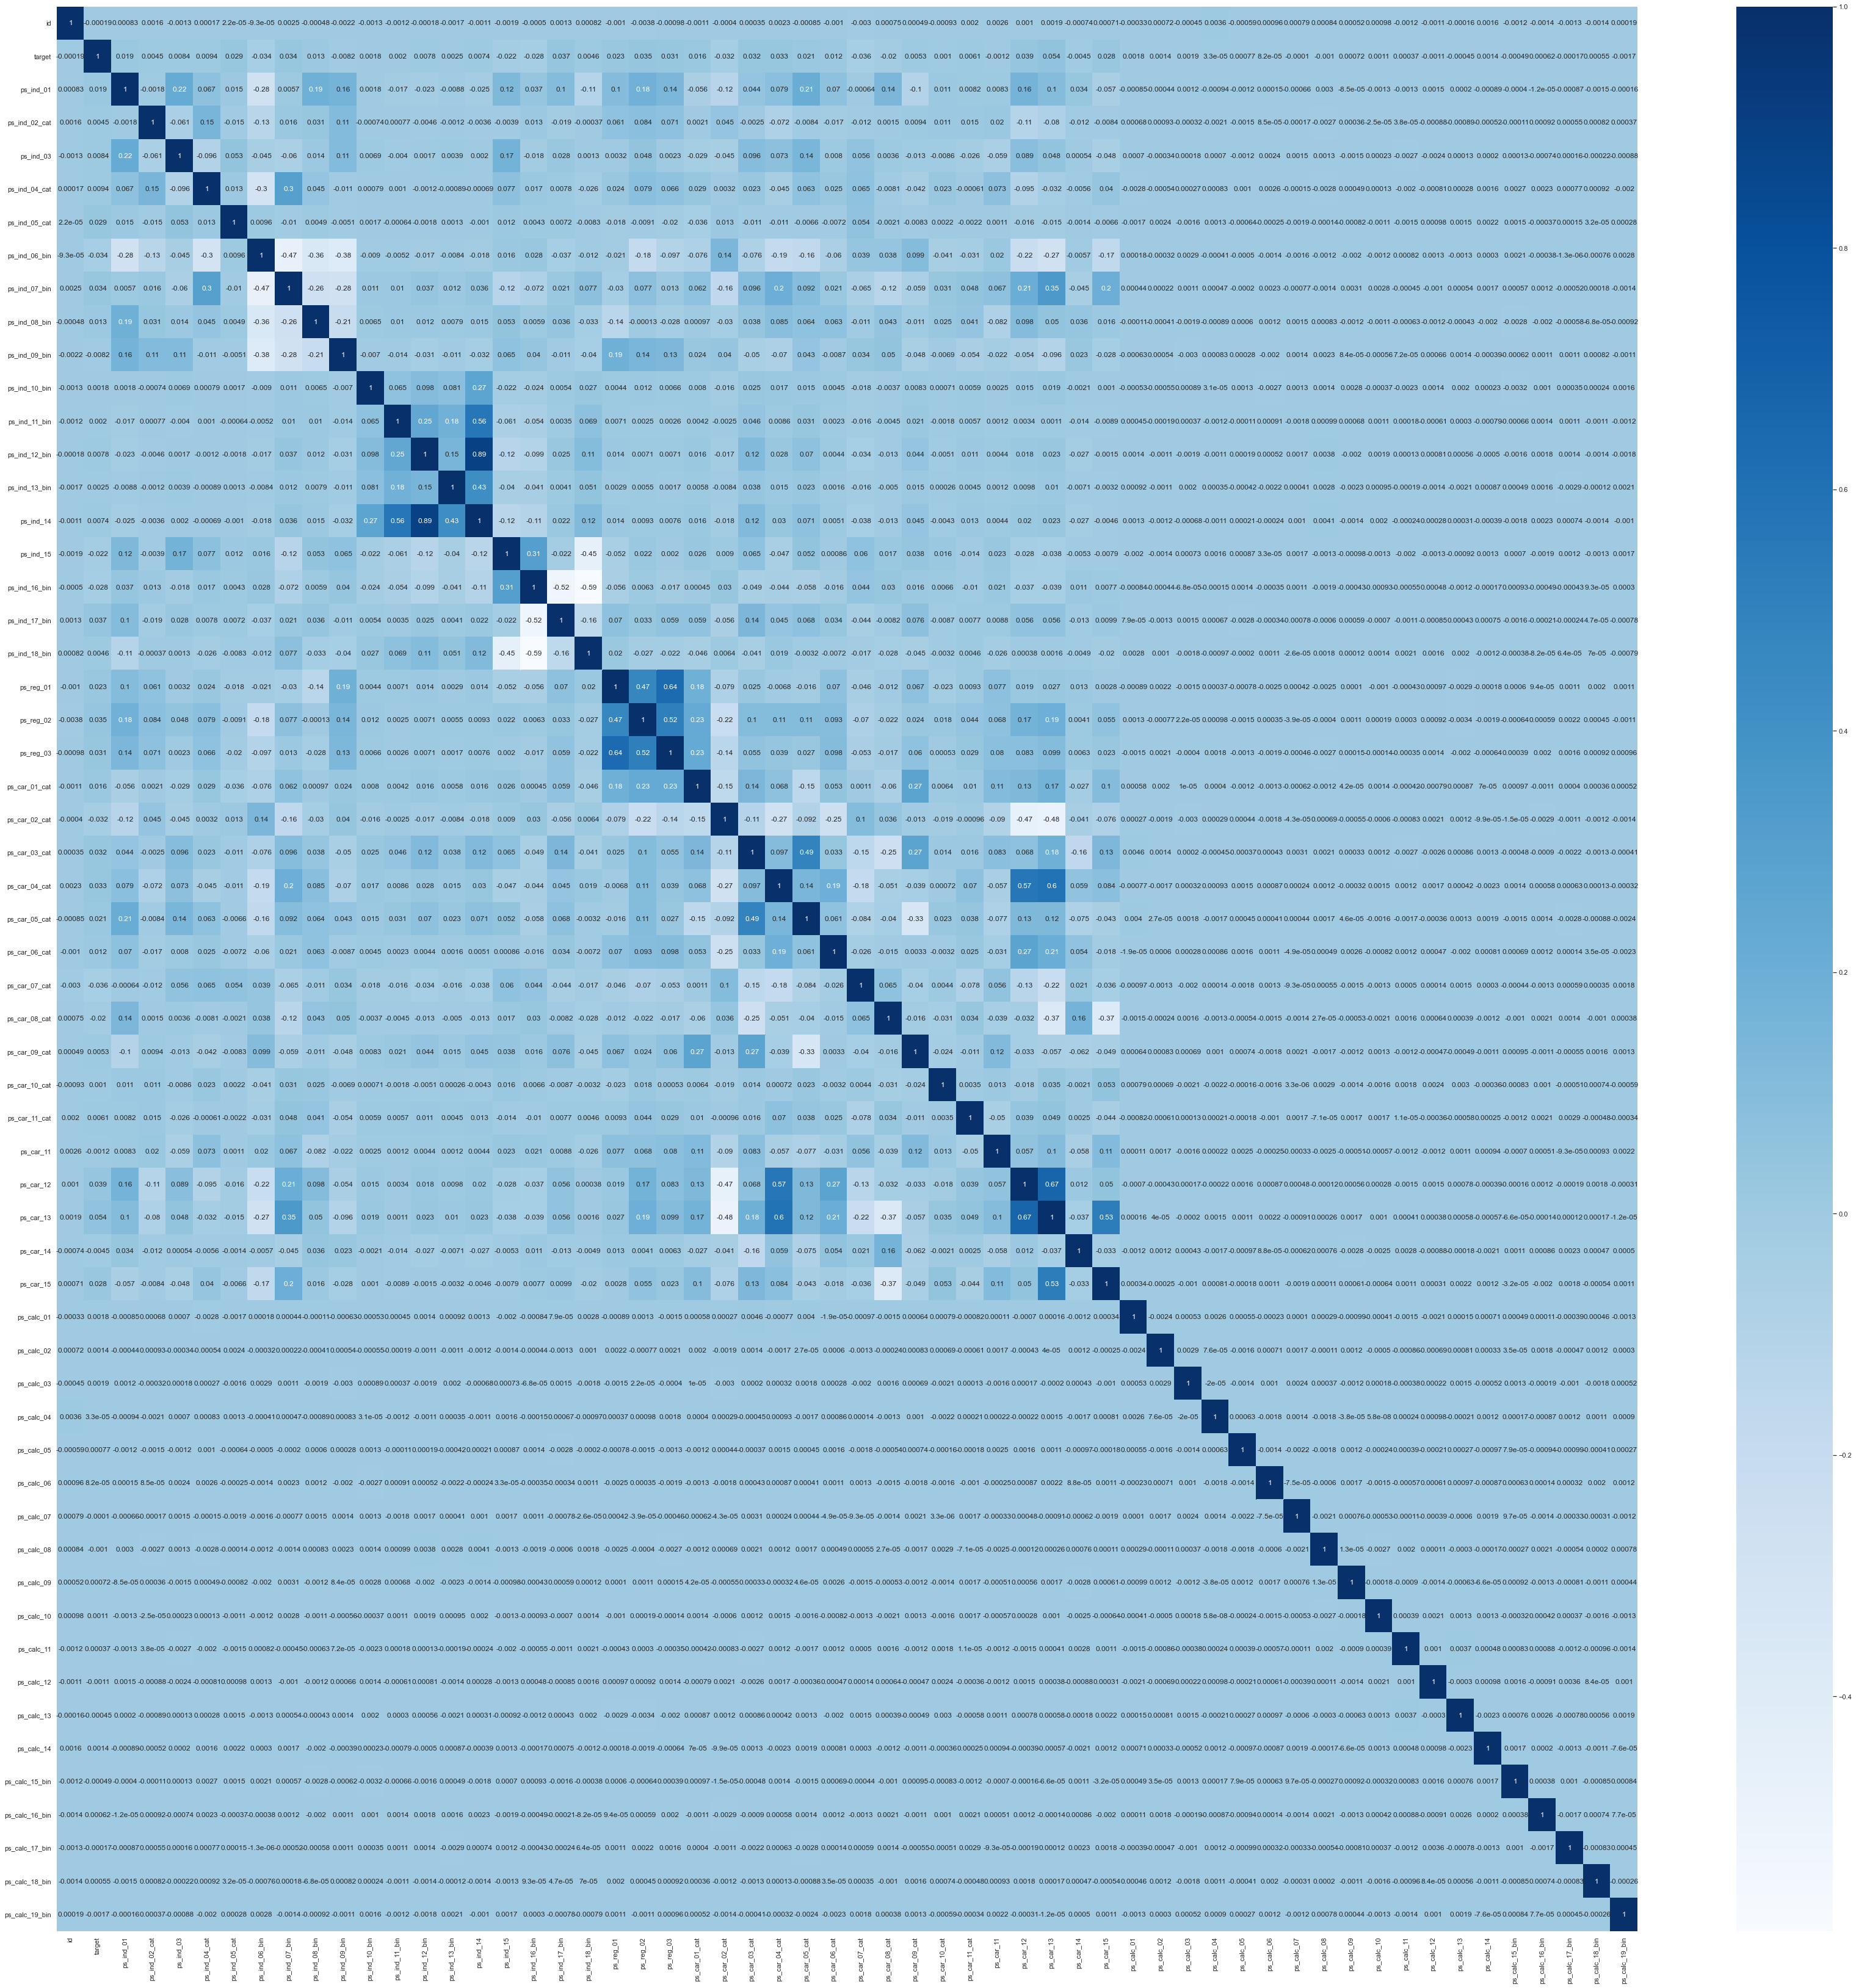

In [43]:
cor = train.iloc[:,:58].corr();
plt.figure(figsize=(58,58))
sns.set(font_scale=1)
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues);

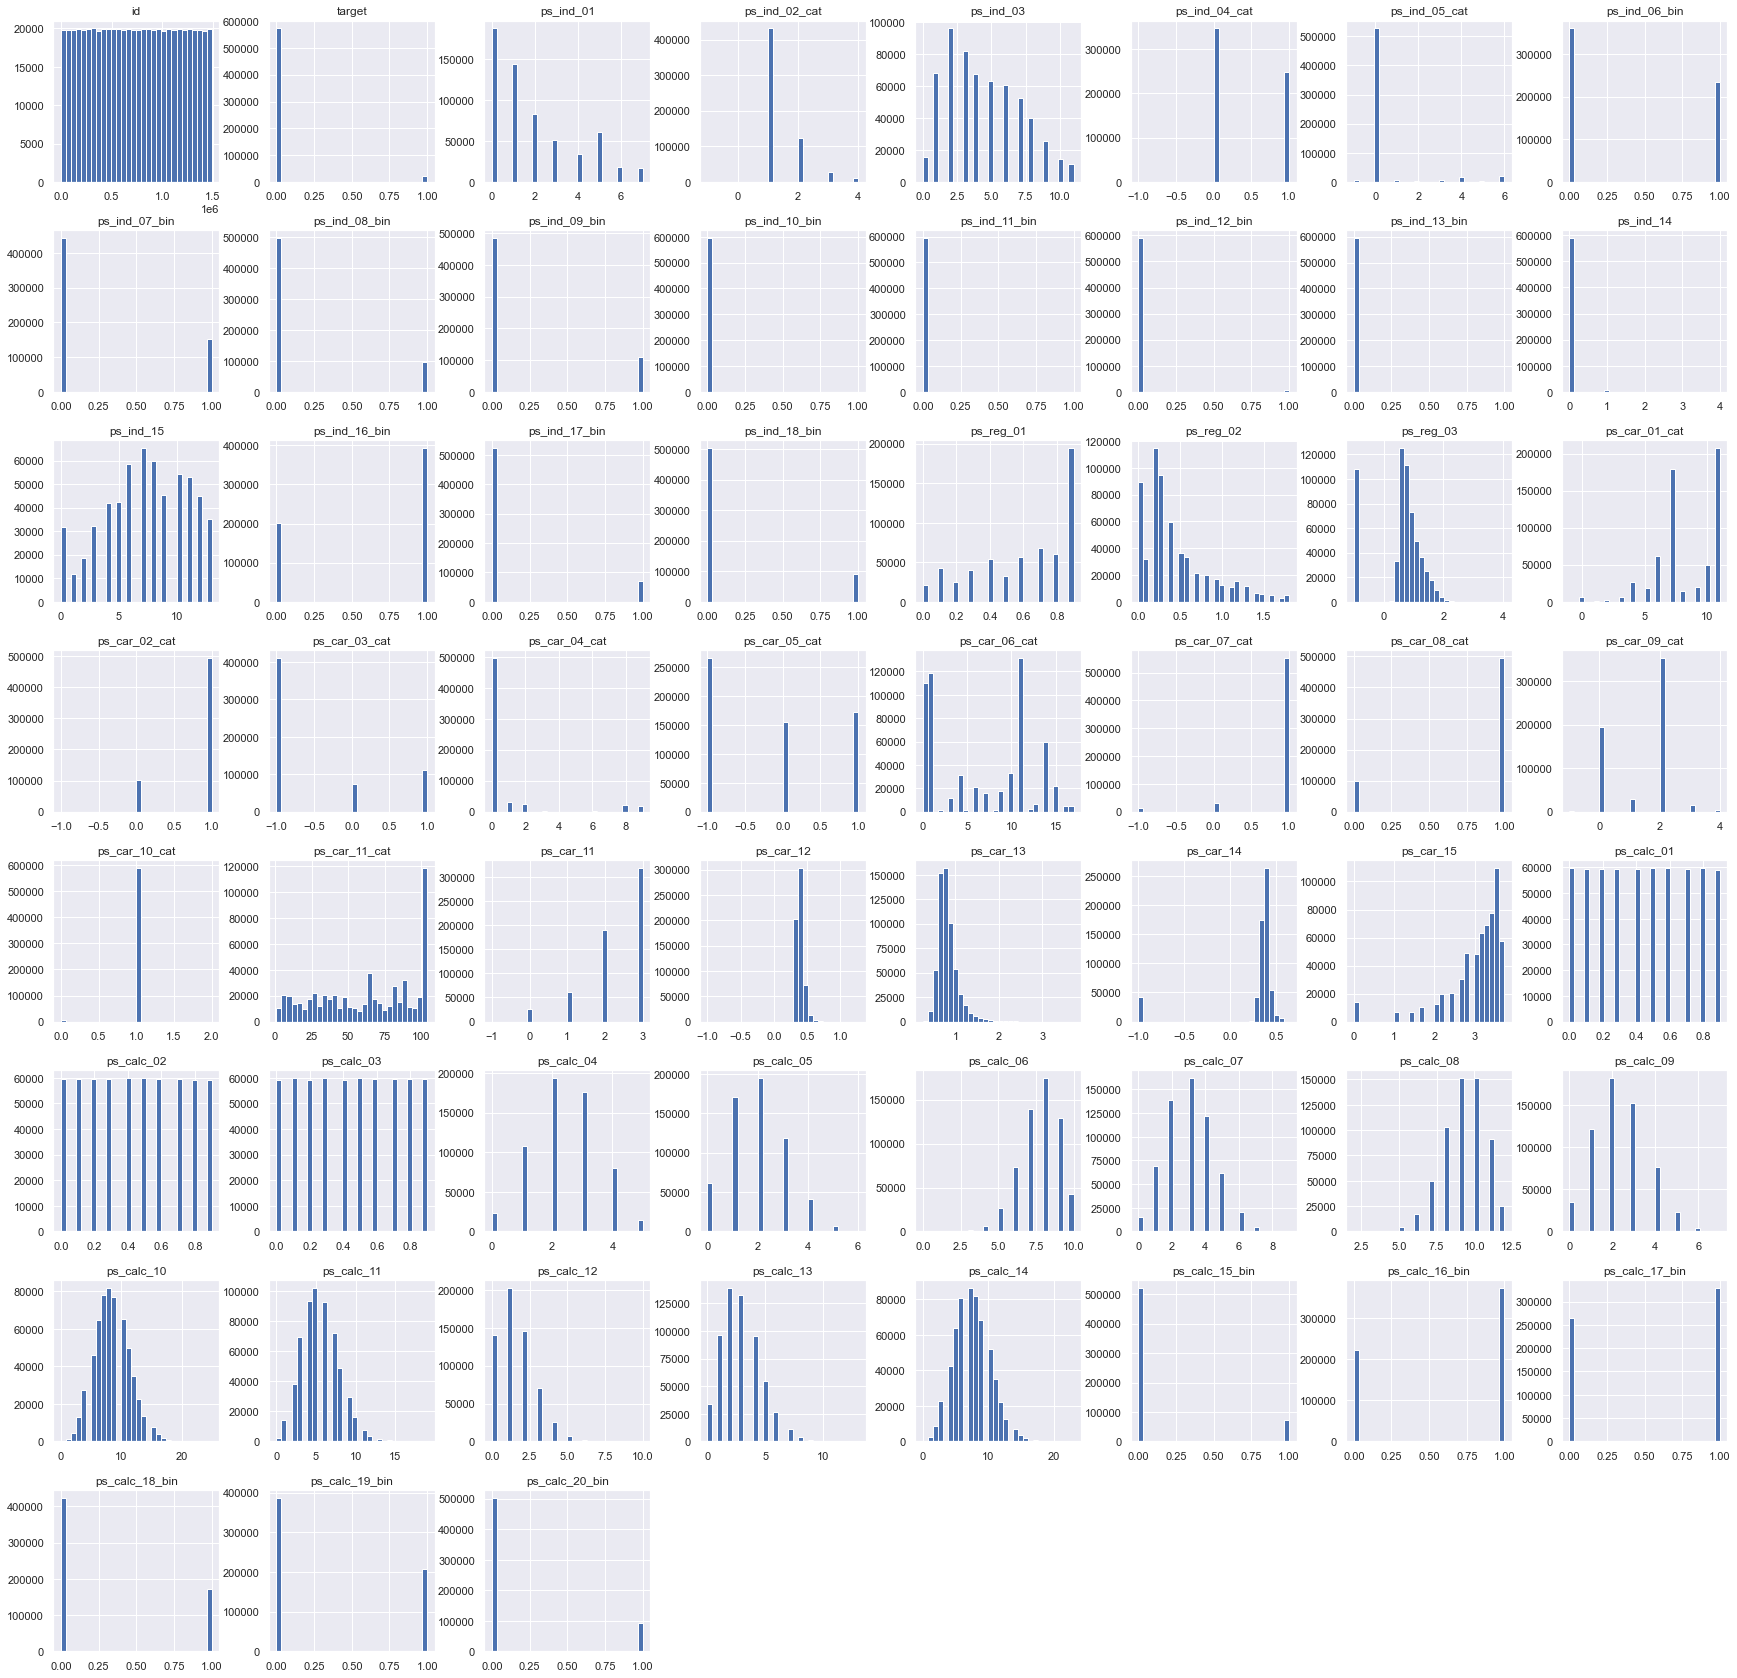

In [44]:
train.hist(figsize=(30,30), bins=30);

## **1.5 The Problem with Class Imbalance**

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
features = [col for col in train.columns if col!='id' and col!='target']
X = train[features]
y = train['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy *100.0))

Accuracy: 96.26%


In [48]:
print(classification_report(y_test, y_pred, target_names = ['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.96      1.00      0.98    114585
     class 1       0.00      0.00      0.00      4458

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.94    119043



/opt/anaconda3/envs/573/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/573/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/573/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['Predicted Negative', "Predicted Positive"], index=['Actual Negative', 'Actual Positive'])

,Predicted Negative,Predicted Positive
Actual Negative,114585,0
Actual Positive,4458,0


Note how both recall and precision of class 1 are 0. 

## **1.6 Ways to Deal with Class Imbalance**

- under-sampling (remove majority)
- over-sampling (regenerate minority)
- hybrid techniques


- found a good kaggle notebook example on sklearn's imblearn
https://www.kaggle.com/residentmario/undersampling-and-oversampling-imbalanced-data

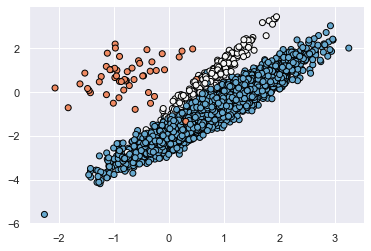

In [50]:
import seaborn as sns
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.01, 0.05, 0.94],
                           class_sep=0.8, random_state=0)

import matplotlib.pyplot as plt
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y]
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
fig = plt.Figure(figsize=(12,6))
plt.scatter(X[:, 0], X[:, 1], c=colors, **kwarg_params)
sns.despine()

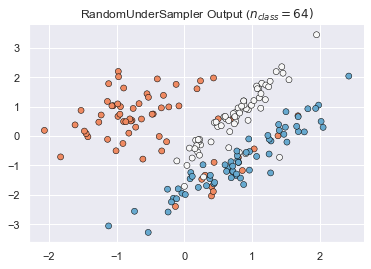

In [51]:
#example:
import numpy as np
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)

colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, linewidth=0.5, edgecolor='black')
sns.despine()
plt.title("RandomUnderSampler Output ($n_{class}=64)$")
pass

**which one to choose? think of the training data size after sampling**

Going with Under-sampling (because original data is large)

Original dataset: class 1: (class 0+ class 1) = 0.036   
Aiming at: class 1: (class 0+ class 1) = 0.15

## Undersampling:

<span style="color:red">**undersampling rate = (1-r) * minority size / (r * majority size)**</span>

<span style="color:red">**where r = desired prportion rate \
    (i.e. desired class 1 / (class 0+class1) ratio after undersampling)**</span>

<span style="color:red">**undersampled majority size = undersampling rate * original majority size**</span>

In [52]:
def undersampling (df, desired_prop_rate = 0.15, plot = True):
    #获取target =0 and 1的index
    idx_class_0 = df[df.target==0].index
    idx_class_1 = df[df.target==1].index
    
    #获取target = 0 and 1 的个数
    count_class_0 = len(idx_class_0)
    count_class_1 = len(idx_class_1)
    
    undersampling_rate = ((1-desired_prop_rate)*count_class_1)/(desired_prop_rate*count_class_0)
    undersampled_majority_size = int(undersampling_rate*count_class_0)
    
    print (f'undersampling rate = {undersampling_rate}')
    print (f'undersampled_majority_size = {undersampled_majority_size}')
    
    from sklearn.utils import shuffle
    
    #用shuffle函数对target=0的所有数据打乱抽样， seed=100 抽样数为undersampled_majority_size
    undersampled_idx = shuffle(idx_class_0, random_state=100, n_samples=undersampled_majority_size)
    
    #把undersampling之后的idx和之前的target=1的idx合并， 并在train里面根据idx把数据索引出来
    idx_total = list(undersampled_idx)+list(idx_class_1)
    
    df = df.loc[idx_total].reset_index(drop=True)
    
    #if plot=True, plot:
    if plot==True:
        import seaborn as sns
        sns.countplot(x = df.target)
        print (df.target.value_counts()/df.shape[0])
    
    return df

undersampling rate = 0.21434840173571998
undersampled_majority_size = 122932
0    0.849999
1    0.150001
Name: target, dtype: float64


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,744529,0,2,1,9,1,0,0,0,1,...,5,1,2,8,0,0,1,0,0,0
1,673907,0,1,1,2,1,0,0,1,0,...,6,4,4,9,1,1,1,1,1,0
2,730796,0,7,1,6,0,4,0,0,0,...,3,1,3,7,0,1,1,0,0,0
3,306142,0,1,1,3,0,0,1,0,0,...,5,0,2,9,0,0,1,0,0,0
4,1102701,0,6,2,7,1,0,0,1,0,...,6,0,2,9,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144621,1487473,1,5,1,7,0,3,0,0,1,...,10,1,5,7,0,1,1,0,0,0
144622,1487566,1,1,1,5,0,0,0,0,1,...,9,2,1,5,0,1,0,0,0,0
144623,1487716,1,0,1,6,1,0,0,1,0,...,3,2,1,6,0,1,1,0,0,0
144624,1487748,1,0,2,2,0,0,1,0,0,...,5,0,4,4,0,0,1,0,1,0


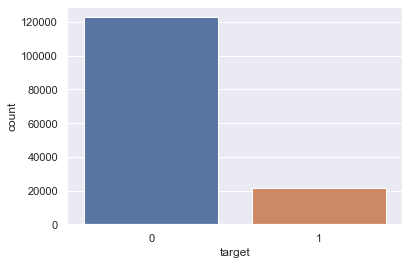

In [53]:
undersampling(df=train, desired_prop_rate = 0.15, plot = True)

Looks good. Let's save it as train_balanced

In [54]:
train_balanced = undersampling (df=train, plot=False)

undersampling rate = 0.21434840173571998
undersampled_majority_size = 122932


In [55]:
train_balanced.to_csv('./data/train_balanced.csv')

In [56]:
train.target.value_counts(normalize=True)

0    0.963552
1    0.036448
Name: target, dtype: float64

In [57]:
train_balanced.target.value_counts(normalize=True)

0    0.849999
1    0.150001
Name: target, dtype: float64

## **1.7 Missing Data**

In [58]:
train_balanced_update = train_balanced.copy()

#generate a meta data table for train_balanced_update
meta_train_balanced = generate_metadata(source_data=train_balanced_update)
meta_train_balanced.to_csv('./data/meta_train_balanced')


In [59]:
# top three columns with the highest amount of missing data
missing_cols = meta_train_balanced.sort_values('Count_Missing_values', ascending=False).query("Count_Missing_values>0").index
meta_train_balanced.sort_values('Count_Missing_values', ascending=False).query("Count_Missing_values>0")[["Level", "Count_Missing_values", "Count_Missing_values_Percentage"]]

,Level,Count_Missing_values,Count_Missing_values_Percentage
Variable Name,,,
ps_car_03_cat,nominal,98459,68.08
ps_car_05_cat,nominal,63882,44.17
ps_reg_03,interval,25226,17.44
ps_car_14,interval,10569,7.31
ps_car_07_cat,nominal,3149,2.18
ps_ind_05_cat,nominal,1604,1.11
ps_car_09_cat,nominal,165,0.11
ps_ind_02_cat,nominal,80,0.06
ps_car_01_cat,nominal,53,0.04


## 1.7.1
The first two features are both nominal and their missing values exceeds 40%. I will drop the top 2 features. 

In [60]:
# Changing meta_train_balanced Keep:

cols_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
meta_train_balanced.loc[cols_to_drop, 'Keep'] = False

## 1.7.2
The 3rd and 4th features are interval (i.e. continuous variable). They represents region and car info respectively. I will look at their distribution by replacing missing value (i.e. -1 with NaN). 

In [61]:
train_balanced[['ps_reg_03', 'ps_car_14']].replace(-1, np.nan).describe()

,ps_reg_03,ps_car_14
count,119400.000000,134057.000000
mean,0.900321,0.374999
std,0.348303,0.046183
min,0.061237,0.109545
25%,0.637377,0.349857
50%,0.808161,0.374433
75%,1.097440,0.398497
max,4.037945,0.631664


In [62]:
train_balanced[['ps_reg_03', 'ps_car_14']].describe()

,ps_reg_03,ps_car_14
count,144626.000000,144626.000000
mean,0.568863,0.274516
std,0.787509,0.360617
min,-1.000000,-1.000000
25%,0.532682,0.330908
50%,0.729298,0.368782
75%,1.014581,0.397492
max,4.037945,0.631664


<AxesSubplot:ylabel='Frequency'>

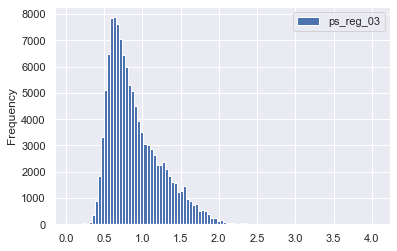

In [63]:
train_balanced[['ps_reg_03']].replace(-1, np.nan).plot(kind="hist", bins=100)

# sns.histplot(train_balanced.ps_reg_03.replace(-1, np.nan));

For "ps_reg_03", We can see it is positive skewed:

1. mode<median<mean
2. replace with **mode** as it is most frequent



<AxesSubplot:ylabel='Frequency'>

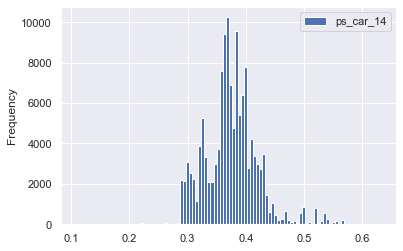

In [64]:
train_balanced[['ps_car_14']].replace(-1, np.nan).plot(kind="hist", bins=100)


#or use sns

# sns.histplot(train_balanced.ps_car_14.replace(-1, np.nan));

For "ps_car_14", We can see that:

1. not exactly normal distribution, but close.
2. mean!= mode!=median

This is when we use **mean** to replace missing value. 

## 1.7.3

The rest of the features are all nominal (categorical) or ordinal features. 

In [65]:
missing_cat_cols = missing_cols[4:].tolist()

In [66]:
missing_cat_cols

['ps_car_07_cat',
 'ps_ind_05_cat',
 'ps_car_09_cat',
 'ps_ind_02_cat',
 'ps_car_01_cat',
 'ps_ind_04_cat',
 'ps_car_11']

<Figure size 432x288 with 0 Axes>

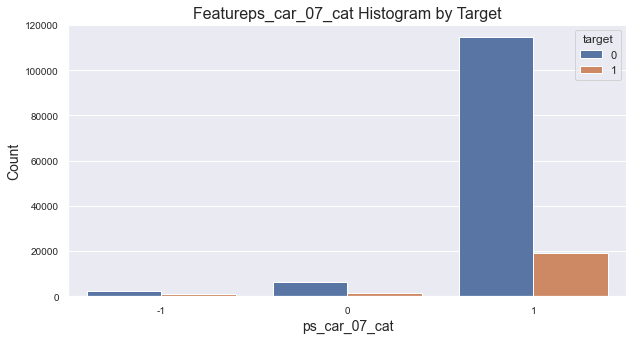

<Figure size 432x288 with 0 Axes>

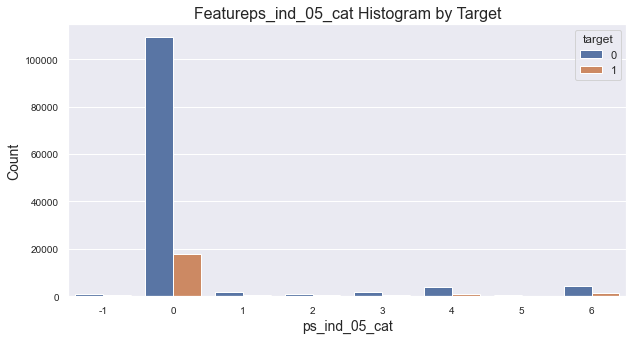

<Figure size 432x288 with 0 Axes>

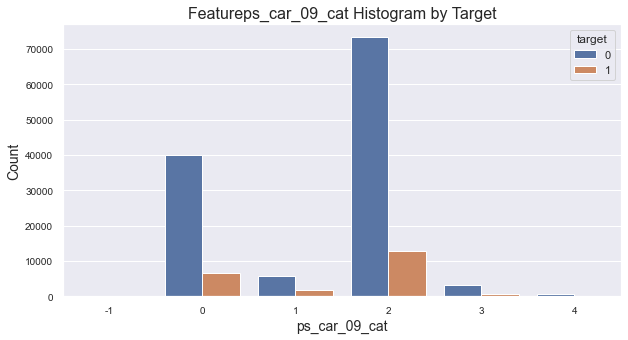

<Figure size 432x288 with 0 Axes>

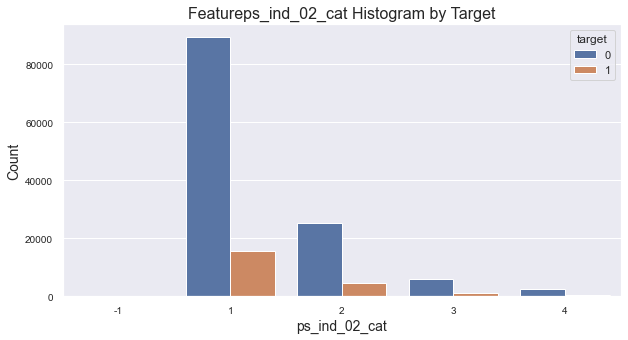

<Figure size 432x288 with 0 Axes>

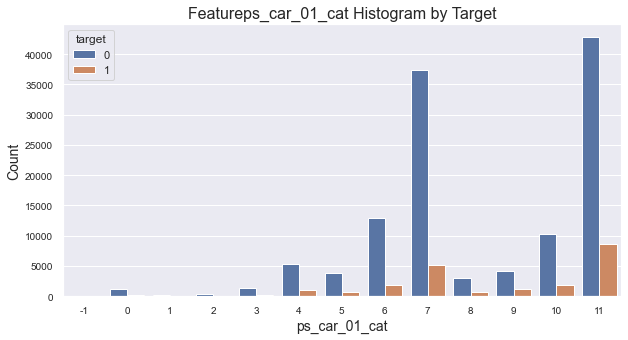

<Figure size 432x288 with 0 Axes>

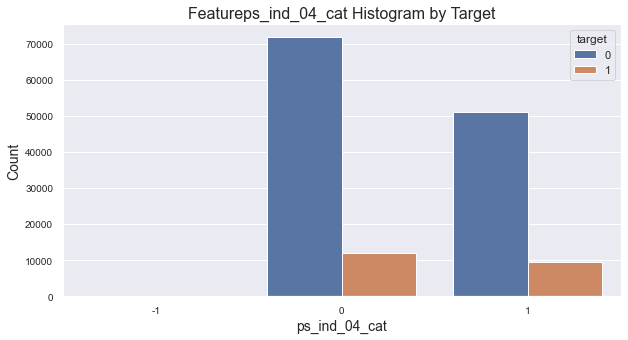

<Figure size 432x288 with 0 Axes>

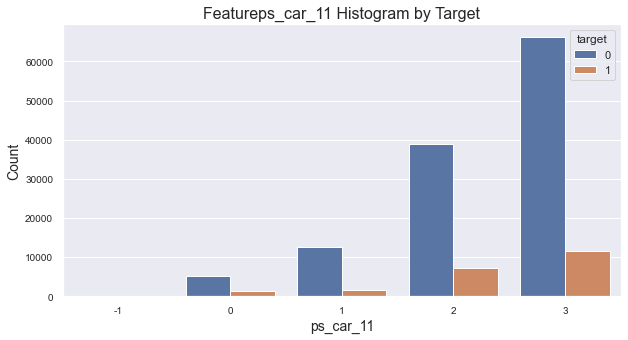

In [67]:
for col in missing_cat_cols:
    plt.figure()
    fig, ax = plt.subplots(figsize=(10,5))
    sns.countplot(x=col, hue='target', data=train_balanced)
    
    plt.ylabel('Count', fontsize=14)
    plt.xlabel(col, fontsize=14)
    plt.title(f'Feature{col} Histogram by Target', fontsize=16)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.show();

We can see that % of the missing value is really low. So we will use SimpleImputer. 

SimpleImputer strategy: mean, median, most_frequent, constant

**add_indicator** bool, default=False
If True, a MissingIndicator transform will stack onto output of the imputer’s transform. This allows a predictive estimator to account for missingness despite imputation. If a feature has no missing values at fit/train time, the feature won’t appear on the missing indicator even if there are missing values at transform/test time.

## 1.7.4 Let's Impute

In [117]:
mode_imputer = SimpleImputer(missing_values = -1, strategy="most_frequent", add_indicator=True)
train_balanced_update['ps_reg_03']= [x[0] for x in mode_imputer.fit_transform(train_balanced_update[['ps_reg_03']]).tolist()]

In [118]:
mean_imputer = SimpleImputer(missing_values = -1, strategy="mean", add_indicator=True)
train_balanced_update['ps_car_14']= [x[0] for x in mean_imputer.fit_transform(train_balanced_update[['ps_reg_03']]).tolist()]

In [119]:
imp = mode_imputer.fit_transform(train_balanced_update[missing_cat_cols])
train_balanced_update[missing_cat_cols]=pd.DataFrame(imp).iloc[:, 0:len(missing_cat_cols)]
train_balanced_update[missing_cat_cols] = train_balanced_update[missing_cat_cols].astype('int64')

# 1.8 EDA

Here I will group the feature values on each feature to look at its impact on the target. 

### 1.8.1 Using orignal undersampled data

<Figure size 432x288 with 0 Axes>

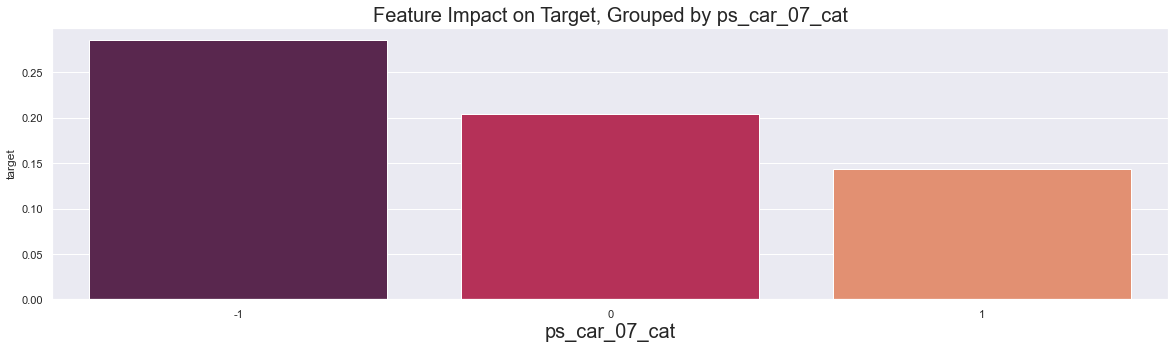

<Figure size 432x288 with 0 Axes>

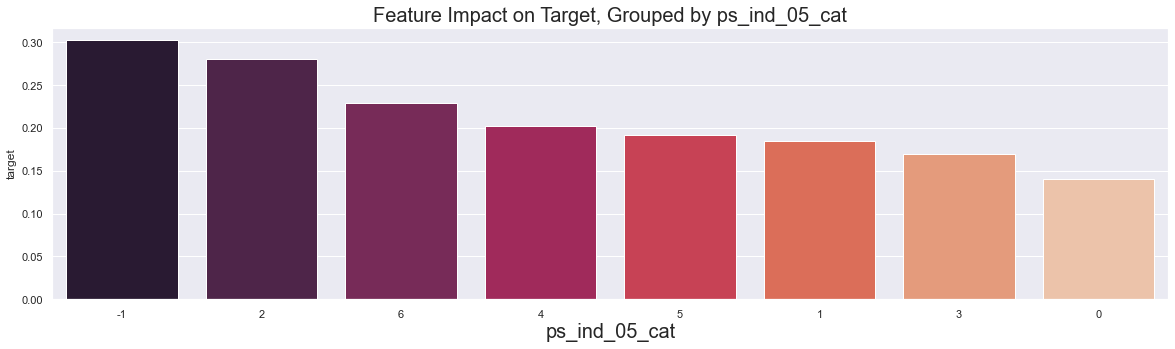

<Figure size 432x288 with 0 Axes>

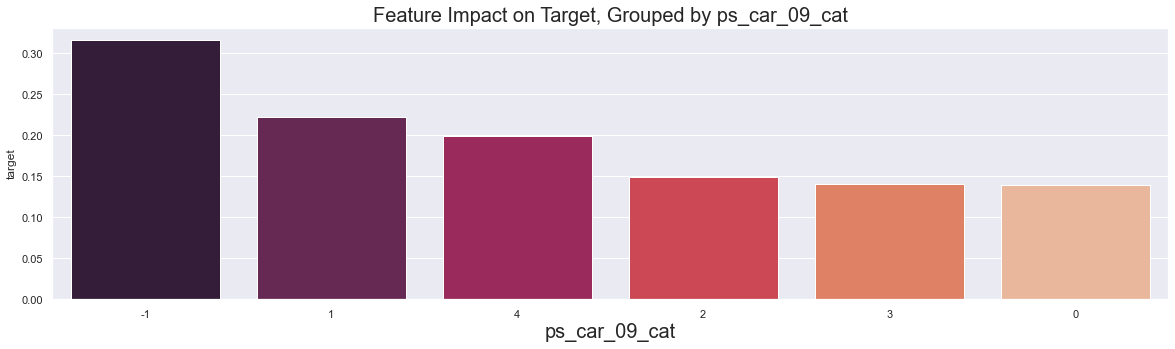

<Figure size 432x288 with 0 Axes>

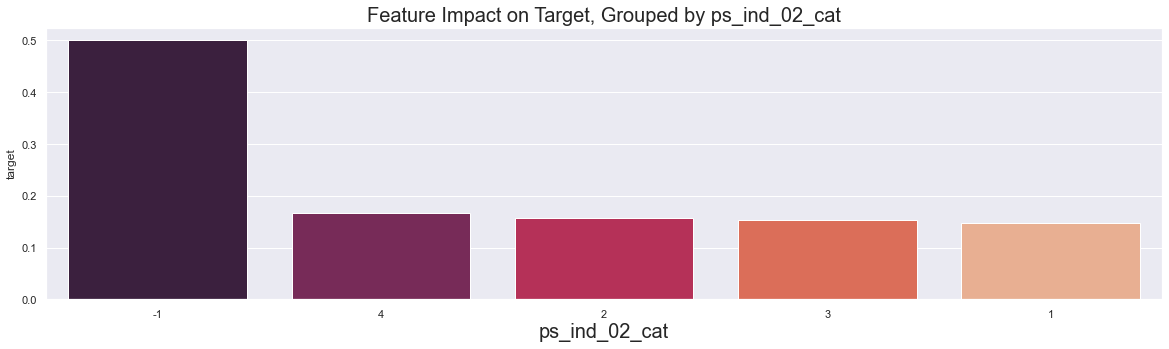

<Figure size 432x288 with 0 Axes>

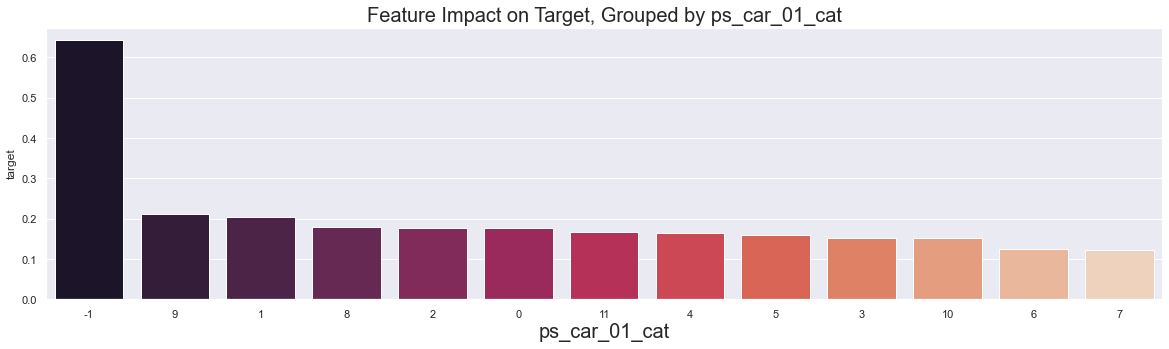

<Figure size 432x288 with 0 Axes>

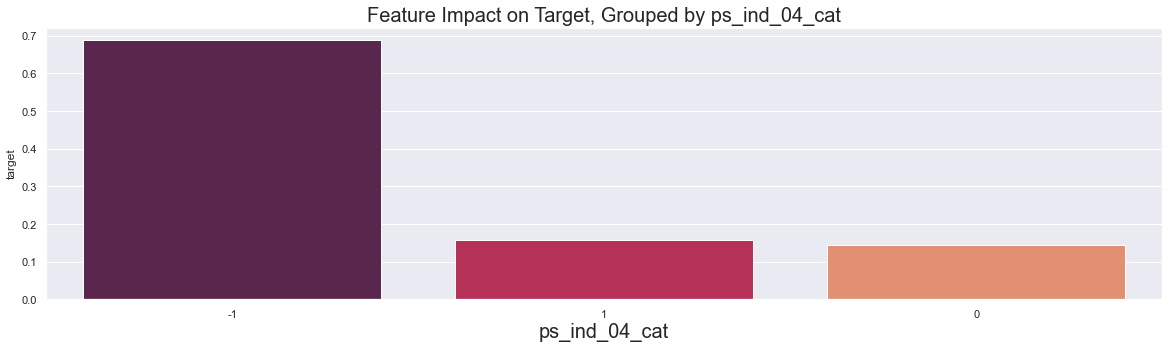

<Figure size 432x288 with 0 Axes>

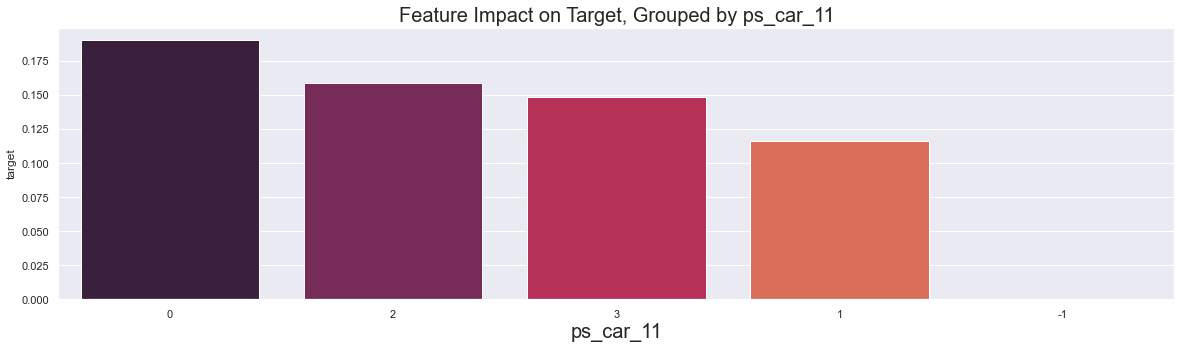

In [120]:
for col in missing_cat_cols:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20, 5))
    
    cat_perc = train_balanced[[col, 'target']].groupby([col], as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    
    sns.barplot(ax=ax, x=col, y='target', data=cat_perc, order=cat_perc[col], palette='rocket')
    plt.title(f'Feature Impact on Target, Grouped by {col}', fontsize=20)
    plt.xlabel(col, fontsize=20)
    #plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show();

### 1.8.2 Using Imputed Data

<Figure size 432x288 with 0 Axes>

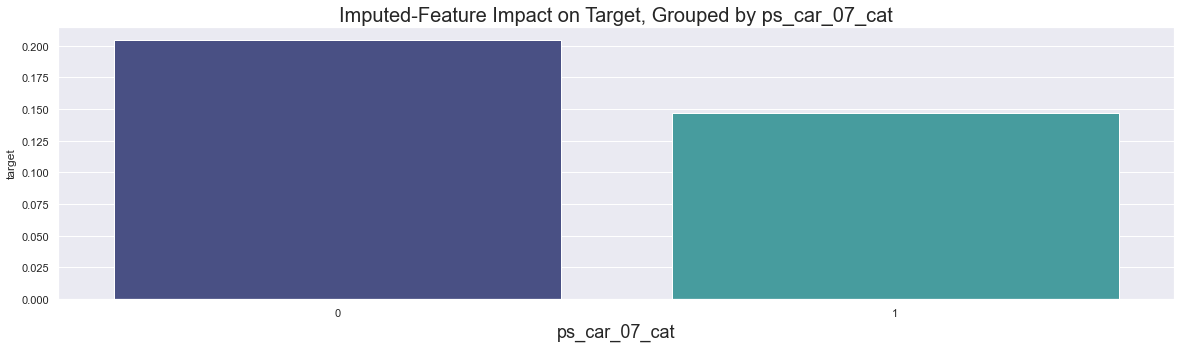

<Figure size 432x288 with 0 Axes>

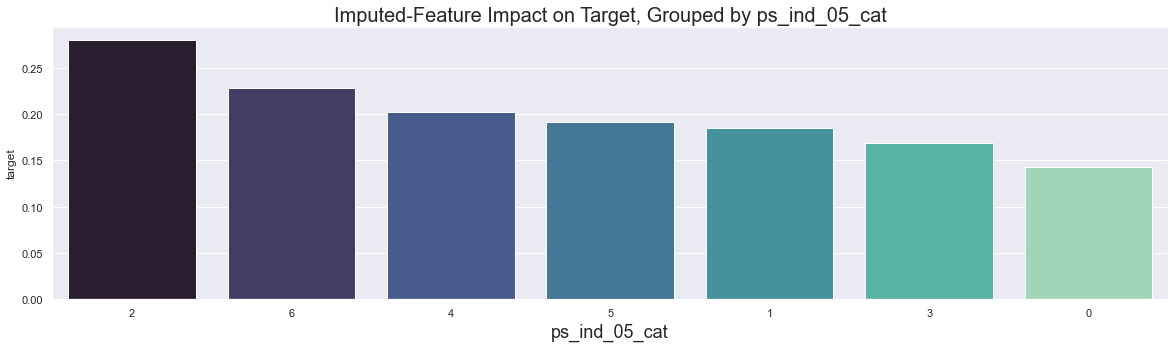

<Figure size 432x288 with 0 Axes>

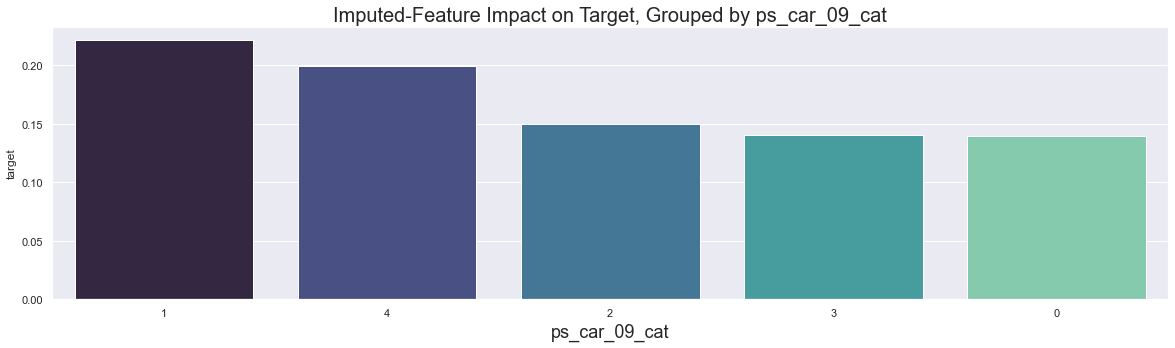

<Figure size 432x288 with 0 Axes>

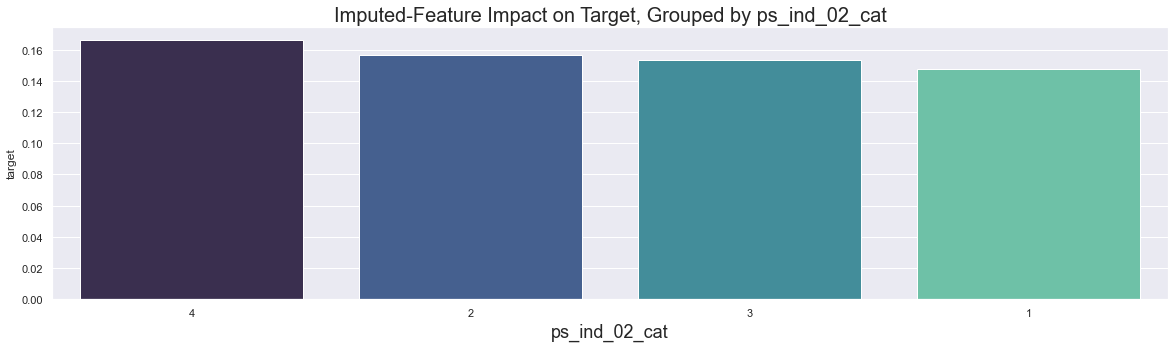

<Figure size 432x288 with 0 Axes>

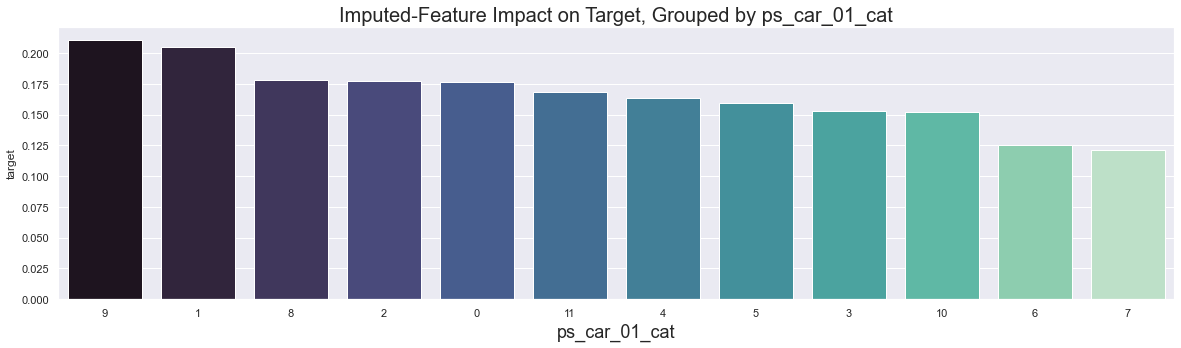

<Figure size 432x288 with 0 Axes>

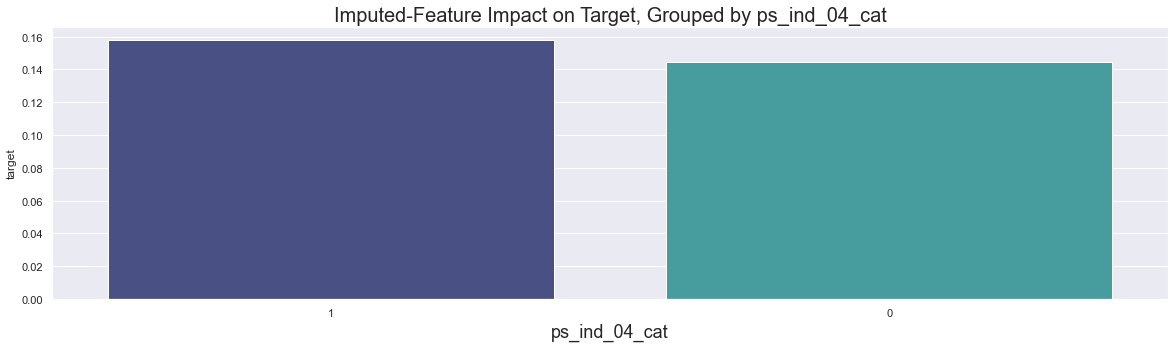

<Figure size 432x288 with 0 Axes>

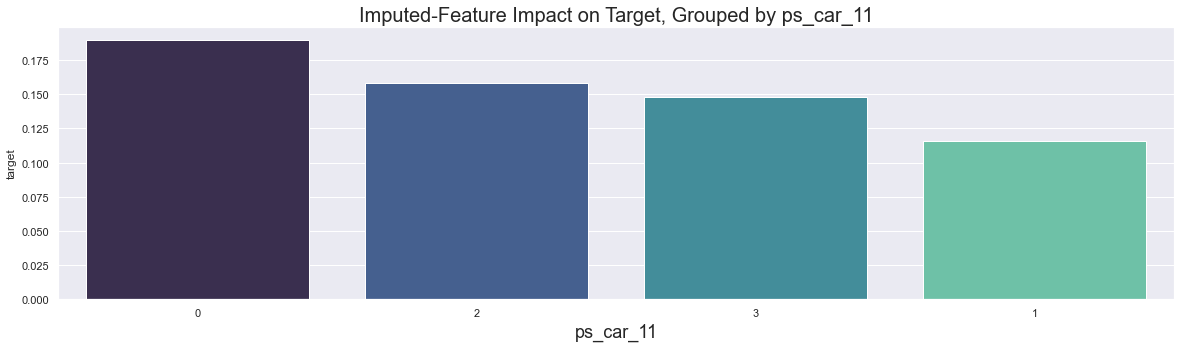

In [121]:
for col in missing_cat_cols:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20, 5))
    
    cat_perc = train_balanced_update[[col, 'target']].groupby([col], as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    
    sns.barplot(ax=ax, x=col, y='target', data=cat_perc, order=cat_perc[col], palette='mako')
    plt.title(f'Imputed-Feature Impact on Target, Grouped by {col}', fontsize=20)
    plt.xlabel(col, fontsize=18)
    #plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show();

### Summary from Above:

1. Missing value -1 has a big impact on "target".  This can be seen by comparing the bar plots between original data and imputed data. For example: For "ps_ins_02_cat", when value is missing (i.e. -1), 60%  of the data has a target = 1, much higher than other values. 
2. Therefore, we should use inverse_transform to reverse the imputation  and keep -1 as a unique value for the first six features. 
3. Continue to use mode to impute the last feature as the amount of missing data is so little. 
4. I will also update meta data.

In [122]:
missing_cat_cols

['ps_car_07_cat',
 'ps_ind_05_cat',
 'ps_car_09_cat',
 'ps_ind_02_cat',
 'ps_car_01_cat',
 'ps_ind_04_cat',
 'ps_car_11']

In [123]:
train_balanced_update[missing_cat_cols[0:6]]=pd.DataFrame(mode_imputer.inverse_transform(imp)).iloc[:, 0:6].astype('int64')

In [135]:
# #update meta_data

# meta_train_balanced = generate_metadata(train_balanced_update).sort_values('Count_Missing_values', ascending=False)
# # Changing meta_train_balanced Keep:

# cols_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
# meta_train_balanced.loc[cols_to_drop, 'Keep'] = False


# meta_train_balanced.sort_values('Count_Missing_values', ascending=False)

## 1.9  Encoding on "ps_car_11_cat"

In [128]:
meta_train_balanced.loc['ps_car_11_cat']

Role                               feature
Level                              nominal
data_type                            int64
Keep                                  True
Unique_values                          104
Count_Missing_values                     0
Count_Missing_values_Percentage          0
Name: ps_car_11_cat, dtype: object

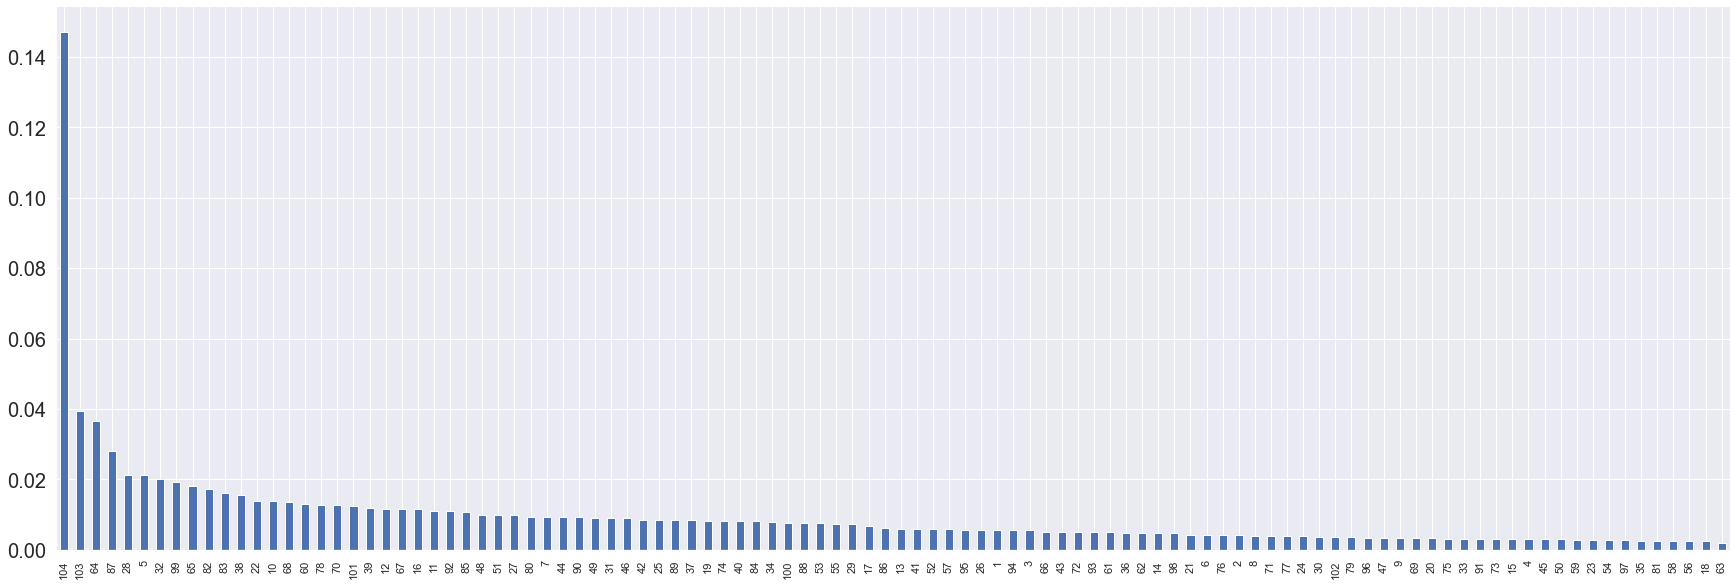

In [148]:
train_balanced_update.ps_car_11_cat.value_counts(normalize=True).plot(kind='bar', figsize=[30, 10])
plt.tick_params(axis='y', which='major', labelsize=20)

Observation from Above: 
1. dominant value: 104 (around 15%) so we cannot simply ignore other values. 
2. 104 unique values but not ordinal
3. Categorial feature

Summary:
1. When feature is **ordinal**, we can use **OrdinalEncoder** or **LabelEncoder**
2. When feature is **nominal**, we can use **OneHotEncoder**


3. However, there are too many unique values (104 of them). OneHotEncoding will cause problem of high dimensionality. (Curse of dimensionality)

## 1.9.1 Target Encoding (also called mean encoding)

Target Encoding: replace feature value with target mean with regard to the feature value

In [154]:
# for example:

d = pd.DataFrame({"Color": ["Yellow", "Yellow", "Blue", "Yellow", "Red", "Yellow", "Red", "Red", "Yellow", "Blue"],
                  "Target": [0,1,1,1,1,0,1,0,1,0]})

In [155]:
d

,Color,Target
0,Yellow,0
1,Yellow,1
2,Blue,1
3,Yellow,1
4,Red,1
5,Yellow,0
6,Red,1
7,Red,0
8,Yellow,1
9,Blue,0


In [156]:
#calculate the mean of each color:

Yellow = 0.6
Blue = 0.5
Red = 0.66

In [159]:
d["Color"] = d.Color.map({
    "Yellow": 0.6,
    "Blue": 0.5,
    "Red": 0.66
})

d

,Color,Target
0,0.60,0
1,0.60,1
2,0.50,1
3,0.60,1
4,0.66,1
5,0.60,0
6,0.66,1
7,0.66,0
8,0.60,1
9,0.50,0


**Problem with target encoding:   
1. target information are being leaked into feature values!!! **Therefore causing overfit**
2. what if two feature values have similar mean of target? It will be hard to differentiate.

In [186]:
# optimized target encoding function:

def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None,
                  tst_series=None,
                  target=None,
                  min_samples_leaf=1,
                  smoothing=1,
                 noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series: training categorical features as a pd.Series
    tst_series: test categorical features as a pd.Series
    target: target data as a pd.Series
    min_sample_leaf (int): minimum samples to take category average into account
    smoothing (int): smoothing effect to balance categorical average vs prior
    """
    
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat ([trn_series, target], axis=1)
    
    # groupby feature value:
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    
    #smoothing:
    smoothing = 1 / (1 + np.exp(-averages["count"] - min_samples_leaf) / smoothing)
    
    #calculate target mean:
    prior = target.mean()
    
    #The bigger the count, the less full_avg is taken into account
    #e.g. 比如104 value 有 21255行， 那么我们就要削减其关于target的mean的权值
    
    averages[target.name] = prior * (1-smoothing) + averages["mean"]*smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    
    #calculate mean for train & test respectively
    
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name:'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    
    ft_trn_series.index = trn_series.index
    
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    
    ft_tst_series.index = tst_series.index
    
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [187]:
train_encoded, test_encoded = target_encode(train_balanced_update['ps_car_11_cat'],
                                            test['ps_car_11_cat'],
                                            target=train_balanced_update.target,
                                            min_samples_leaf=100,
                                            smoothing=10,
                                            noise_level=0.01
                                           )

In [192]:
train_balanced_update['ps_car_11_cat_tar_enc'] = train_encoded.astype('float64')
test['ps_car_11_cat_tar_enc'] = test_encoded.astype('float64')

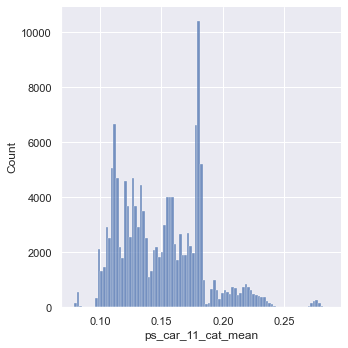

In [195]:
sns.displot(train_encoded)

## 1.10 Redefining Generate Meta Function

In [209]:
#generate a meta data table
def meta(raw_data, processed_data=None, cols_to_drop = [], keep_missing = True):
    """
    raw_data: original unprocessed data
    processed_data: data after preprocessing
    cols_to_drop: excluded cols that contain too many missing values or we don't use
    keep_missing: True if we find we don't need to eliminate missing values after imputation
    """
    
    data = []
    
    if processed_data is not None:
        df = processed_data.copy()
    else:
        df = raw_data
    
    for col in df.columns:
        #defining the role
        if col == 'target':
            role = "target"
        elif col == 'id':
            role = 'id'
        else:
            role = 'feature'

        #defining the level
        if 'bin' in col or col=='target':
            level = 'binary'
        elif 'cat' in col or col == 'id':
            level = 'nominal'
        elif df[col].dtype == 'float64' and df[col].replace(-1, np.nan).max()-df[col].replace(-1, np.nan).min()>1:
            level = 'interval'
        elif df[col].dtype == 'float64' and df[col].replace(-1, np.nan).max()-df[col].replace(-1, np.nan).min()<=1:
            level = 'ratio'
        elif df[col].dtype == 'int64':
            level = 'ordinal'
        
        #defining the data type:
        dtype = df[col].dtype
        
        #initialize keep = True for all features except ID
        keep = True
        if col == 'id' or col in cols_to_drop:
            keep = False
        
        #define unique value:
        if col == 'id' or df[col].dtype == 'float64':
            uniq = 'Not Applicable'
        else:
            if keep_missing == True:
                uniq = train[col].nunique()
            else:
                uniq = train[col].replace({-1: np.nan}).nunique()
        
        #define missing value:
        n_missing = sum(df[col] == -1)
        missing = f'{n_missing}({round(n_missing*100/len(train), 2)}%)'
    
        
    # creating the meta data table
    
        col_dict = {
            "Variable Name": col,
            "Role": role,
            "Level": level,
            "data_type": dtype,
            "Keep": keep,
            "Unique_values": uniq,
            "Count_Missing_values": missing
        }
        
        data.append(col_dict)
        
    meta = pd.DataFrame(data, columns=list(col_dict.keys()))
    meta.set_index('Variable Name', inplace=True)
    
    missing_cols = [col for col in raw_data.columns if raw_data[col].min() == -1]
    meta["Missing Value Impute"] = ['No Missing Value' if col not in missing_cols
                                    else 'Feature Removed' if col in cols_to_drop
                                    else "Keep Missing Value" if meta.loc[col, "Count_Missing_values"][0]!= '0'
                                    else "Imputed" for col in meta.index
                                   ]
    return meta

In [210]:
final_meta = meta(raw_data = train, 
                 processed_data = train_balanced_update,
                 cols_to_drop = cols_to_drop,
                 keep_missing = True)
final_meta

,Role,Level,data_type,Keep,Unique_values,Count_Missing_values,Missing Value Impute
Variable Name,,,,,,,
id,id,nominal,int64,False,Not Applicable,0(0.0%),No Missing Value
target,target,binary,int64,True,2,0(0.0%),No Missing Value
ps_ind_01,feature,ordinal,int64,True,8,0(0.0%),No Missing Value
ps_ind_02_cat,feature,nominal,int64,True,5,80(0.01%),Keep Missing Value
ps_ind_03,feature,ordinal,int64,True,12,0(0.0%),No Missing Value
ps_ind_04_cat,feature,nominal,int64,True,3,48(0.01%),Keep Missing Value
ps_ind_05_cat,feature,nominal,int64,True,8,1604(0.27%),Keep Missing Value
ps_ind_06_bin,feature,binary,int64,True,2,0(0.0%),No Missing Value
ps_ind_07_bin,feature,binary,int64,True,2,0(0.0%),No Missing Value


In [212]:
final_meta.to_csv('./data/final_meta.csv') 